# WeatherPy

---
Summary Analysis of Weather Trends: 

After using scatter plots and performing r-square regression and Pearsons correlations, it shows that Temperatude has a direct relationship with latitude. From the center/Equator the temperature decreases as you towards Northern Hemisphere. With reference to Southern Hemisphere, the tempetature also decreases but not as much as the Northern Hemisphere that it just nearly reach zero. 

For the Northern Hemsispher, the r-squared value shows a strong relationship of Max Tem vs Latitude for Northern hemisphere. These means when we go farther away from the equater(latitude 0) the maximum Temperature (F) will decrease. The corelation factor shows as Max Temperature increases the Latitude goes nearer to the center/Equator. While the Southern Hemisphere,  the r-squared value shows a strong relationship of Max Tem vs Latitude for Southern hemisphere. The regression line is the opposite of that of from the Northern Hemisphere. These means when we go farther away from the equater(latitude 0) the maximum Temperature (F) will increase. The correlation factor shows as Max Temperature increases the Latitude goes nearer to the center/Equator. 

Wind speed tends to generally be betweeen 0 and 15 mph regardless of latitude. Wind Speed for Northen Hemisphere is on a straight line with negative linear relationship while the Southern Hemisphere of downward trend with avery weak linear relationship.




In [45]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

import datetime

### Generate the Cities List by Using the `citipy` Library

In [46]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 582


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [47]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units ="imperial"

query_url = f"{url}appid={weather_api_key}&units={units}&q="
print (query_url)

#api.openweathermap.org/data/2.5/weather?q=London,uk&APPID=a9a5edb8514cdf1815f1231c18cf178a

http://api.openweathermap.org/data/2.5/weather?appid=a9a5edb8514cdf1815f1231c18cf178a&units=imperial&q=


In [19]:
#query_url = f"{url}appid={weather_api_key}&units={units}&q="
#get weather data for London and convert reponse to json
#response = requests.get(query_url + 'london').json()
#display(response)

In [48]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key
units ="imperial"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city =  city_weather["name"]
        city_lat =  city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather ["main"]["humidity"]
        city_clouds = city_weather ["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
city_data

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hasaki
Processing Record 2 of Set 1 | desaguadero
Processing Record 3 of Set 1 | cockburn town
Processing Record 4 of Set 1 | coahuayana de hidalgo
Processing Record 5 of Set 1 | puerto ayora
Processing Record 6 of Set 1 | vila velha
Processing Record 7 of Set 1 | port-aux-francais
Processing Record 8 of Set 1 | puerto san carlos
City not found. Skipping...
Processing Record 9 of Set 1 | tsimasham
Processing Record 10 of Set 1 | tiksi
Processing Record 11 of Set 1 | baixa grande
Processing Record 12 of Set 1 | iqaluit
Processing Record 13 of Set 1 | waitangi
Processing Record 14 of Set 1 | bredasdorp
Processing Record 15 of Set 1 | kapuskasing
Processing Record 16 of Set 1 | auki
Processing Record 17 of Set 1 | margaret river
Processing Record 18 of Set 1 | kasempa
Processing Record 19 of Set 1 | kuala tungkal
Processing Record 20 of Set 1 | road town
Processing Record 21 of Set 1 | port mathurin

Processing Record 36 of Set 4 | san ignacio
Processing Record 37 of Set 4 | port alfred
Processing Record 38 of Set 4 | kingisepp
Processing Record 39 of Set 4 | georgetown
Processing Record 40 of Set 4 | norfolk
Processing Record 41 of Set 4 | haiku-pauwela
Processing Record 42 of Set 4 | jamestown
Processing Record 43 of Set 4 | kirakira
Processing Record 44 of Set 4 | grinnell
Processing Record 45 of Set 4 | lompoc
Processing Record 46 of Set 4 | hammerfest
Processing Record 47 of Set 4 | la'ie
Processing Record 48 of Set 4 | sinabang
Processing Record 49 of Set 4 | kerikeri
Processing Record 0 of Set 5 | port elizabeth
Processing Record 1 of Set 5 | puerto armuelles
Processing Record 2 of Set 5 | mitu
Processing Record 3 of Set 5 | newman
Processing Record 4 of Set 5 | altay
Processing Record 5 of Set 5 | druzhny
Processing Record 6 of Set 5 | mascote
Processing Record 7 of Set 5 | shimoda
Processing Record 8 of Set 5 | sitka
Processing Record 9 of Set 5 | guanica
Processing Record

Processing Record 30 of Set 8 | fortuna
Processing Record 31 of Set 8 | bereket
Processing Record 32 of Set 8 | piton saint-leu
Processing Record 33 of Set 8 | puerto deseado
Processing Record 34 of Set 8 | santiago del torno
Processing Record 35 of Set 8 | san fernando de monte cristi
Processing Record 36 of Set 8 | bijie
Processing Record 37 of Set 8 | callao
Processing Record 38 of Set 8 | puerto quijarro
Processing Record 39 of Set 8 | kalmunai
Processing Record 40 of Set 8 | bowen
Processing Record 41 of Set 8 | heyuan
Processing Record 42 of Set 8 | kulhudhuffushi
Processing Record 43 of Set 8 | scottburgh
Processing Record 44 of Set 8 | jalai nur
Processing Record 45 of Set 8 | valparaiso
Processing Record 46 of Set 8 | aracoiaba
Processing Record 47 of Set 8 | kill devil hills
Processing Record 48 of Set 8 | kone
Processing Record 49 of Set 8 | oamaru
Processing Record 0 of Set 9 | waddan
Processing Record 1 of Set 9 | richmond
Processing Record 2 of Set 9 | chaiya
Processing R

Processing Record 15 of Set 12 | rzhev
Processing Record 16 of Set 12 | selfoss
Processing Record 17 of Set 12 | khabarovsk
Processing Record 18 of Set 12 | we
City not found. Skipping...
Processing Record 19 of Set 12 | carutapera
Processing Record 20 of Set 12 | veraval
Processing Record 21 of Set 12 | tchintabaraden
Processing Record 22 of Set 12 | mahina
Processing Record 23 of Set 12 | shenjiamen
Processing Record 24 of Set 12 | kapsan-up
Processing Record 25 of Set 12 | ventspils
Processing Record 26 of Set 12 | ouricuri
Processing Record 27 of Set 12 | pasni
Processing Record 28 of Set 12 | monrovia
Processing Record 29 of Set 12 | cavite city
Processing Record 30 of Set 12 | tobi village
City not found. Skipping...
Processing Record 31 of Set 12 | narimanov
-----------------------------
Data Retrieval Complete      
-----------------------------


[{'City': 'Hasaki',
  'Lat': 35.7333,
  'Lng': 140.8333,
  'Max Temp': 3.22,
  'Humidity': 74,
  'Cloudiness': 100,
  'Wind Speed': 1.51,
  'Country': 'JP',
  'Date': 1703876157},
 {'City': 'Desaguadero',
  'Lat': -16.5656,
  'Lng': -69.0417,
  'Max Temp': 17.22,
  'Humidity': 41,
  'Cloudiness': 93,
  'Wind Speed': 6.62,
  'Country': 'PE',
  'Date': 1703876158},
 {'City': 'Cockburn Town',
  'Lat': 21.4612,
  'Lng': -71.1419,
  'Max Temp': 26.98,
  'Humidity': 74,
  'Cloudiness': 75,
  'Wind Speed': 3.09,
  'Country': 'TC',
  'Date': 1703876158},
 {'City': 'Coahuayana de Hidalgo',
  'Lat': 18.7,
  'Lng': -103.6583,
  'Max Temp': 28.32,
  'Humidity': 50,
  'Cloudiness': 0,
  'Wind Speed': 2.38,
  'Country': 'MX',
  'Date': 1703876158},
 {'City': 'Puerto Ayora',
  'Lat': -0.7393,
  'Lng': -90.3518,
  'Max Temp': 29.98,
  'Humidity': 91,
  'Cloudiness': 53,
  'Wind Speed': 3.13,
  'Country': 'EC',
  'Date': 1703875896},
 {'City': 'Vila Velha',
  'Lat': -20.3297,
  'Lng': -40.2925,
  'Max 

In [49]:
city_data

[{'City': 'Hasaki',
  'Lat': 35.7333,
  'Lng': 140.8333,
  'Max Temp': 3.22,
  'Humidity': 74,
  'Cloudiness': 100,
  'Wind Speed': 1.51,
  'Country': 'JP',
  'Date': 1703876157},
 {'City': 'Desaguadero',
  'Lat': -16.5656,
  'Lng': -69.0417,
  'Max Temp': 17.22,
  'Humidity': 41,
  'Cloudiness': 93,
  'Wind Speed': 6.62,
  'Country': 'PE',
  'Date': 1703876158},
 {'City': 'Cockburn Town',
  'Lat': 21.4612,
  'Lng': -71.1419,
  'Max Temp': 26.98,
  'Humidity': 74,
  'Cloudiness': 75,
  'Wind Speed': 3.09,
  'Country': 'TC',
  'Date': 1703876158},
 {'City': 'Coahuayana de Hidalgo',
  'Lat': 18.7,
  'Lng': -103.6583,
  'Max Temp': 28.32,
  'Humidity': 50,
  'Cloudiness': 0,
  'Wind Speed': 2.38,
  'Country': 'MX',
  'Date': 1703876158},
 {'City': 'Puerto Ayora',
  'Lat': -0.7393,
  'Lng': -90.3518,
  'Max Temp': 29.98,
  'Humidity': 91,
  'Cloudiness': 53,
  'Wind Speed': 3.13,
  'Country': 'EC',
  'Date': 1703875896},
 {'City': 'Vila Velha',
  'Lat': -20.3297,
  'Lng': -40.2925,
  'Max 

In [50]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
# Show Record Count
city_data_df.count()

City          553
Lat           553
Lng           553
Max Temp      553
Humidity      553
Cloudiness    553
Wind Speed    553
Country       553
Date          553
dtype: int64

In [51]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hasaki,35.7333,140.8333,3.22,74,100,1.51,JP,1703876157
1,Desaguadero,-16.5656,-69.0417,17.22,41,93,6.62,PE,1703876158
2,Cockburn Town,21.4612,-71.1419,26.98,74,75,3.09,TC,1703876158
3,Coahuayana de Hidalgo,18.7000,-103.6583,28.32,50,0,2.38,MX,1703876158
4,Puerto Ayora,-0.7393,-90.3518,29.98,91,53,3.13,EC,1703875896


In [52]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [53]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Hasaki,35.7333,140.8333,3.22,74,100,1.51,JP,1703876157
1,Desaguadero,-16.5656,-69.0417,17.22,41,93,6.62,PE,1703876158
2,Cockburn Town,21.4612,-71.1419,26.98,74,75,3.09,TC,1703876158
3,Coahuayana de Hidalgo,18.7000,-103.6583,28.32,50,0,2.38,MX,1703876158
4,Puerto Ayora,-0.7393,-90.3518,29.98,91,53,3.13,EC,1703875896


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [54]:
# Creating Date of Analysis variable
date_of_analysis = datetime.date.today()

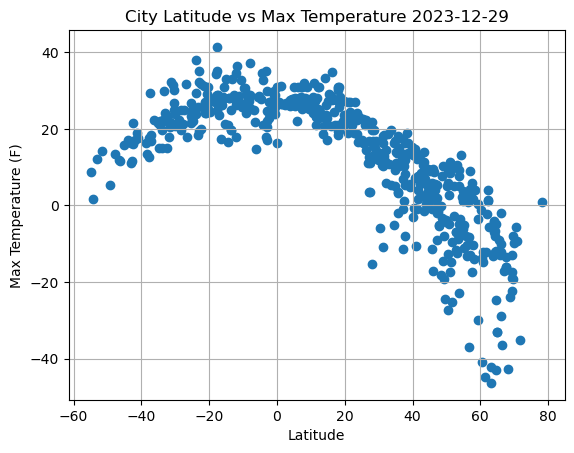

In [55]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values, y_values)


# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f"City Latitude vs Max Temperature {date_of_analysis}")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

Analysis of Fig1 - City Latitude vs Max Temperature: The trend shows there is warmer temperature as 
cities are closer to the center (Equator). As its winter months the temperature is relatively cooler in the south and are at negative as it goes up north. 

#### Latitude Vs. Humidity

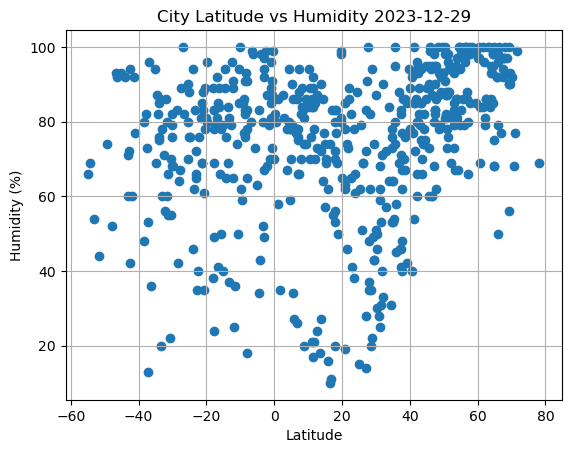

In [71]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
plt.scatter(x_values, y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f"City Latitude vs Humidity {date_of_analysis}")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

Analysis of Fig2 - City Latitude vs Humidity: The above scatter plot displayed the relationship 
    between Humidity (%) vs. Latitude.Today's result show humidity is fairly distributed 
    troughout the plot, there is high humidity for cities found near and further to the equator.

#### Latitude Vs. Cloudiness

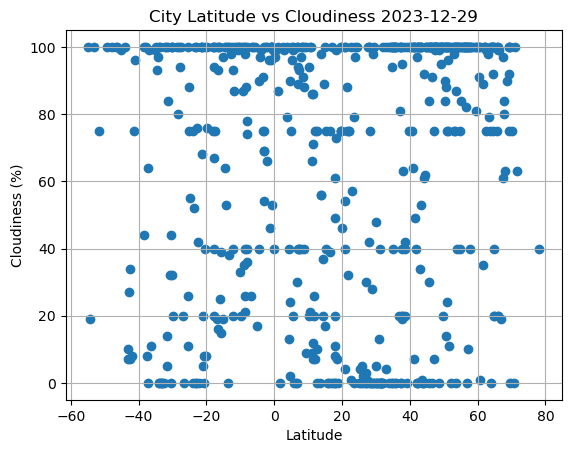

In [57]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
plt.scatter(x_values, y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f"City Latitude vs Cloudiness {date_of_analysis}")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

Analysis of Fig3 - City Latitude vs Cloudiness: The above scatter plot displayed the relationship 
    between Cloudiness vs. Latitude.Today's result show cloudiness is fairly distributed 
    troughout the plot. 

#### Latitude vs. Wind Speed Plot

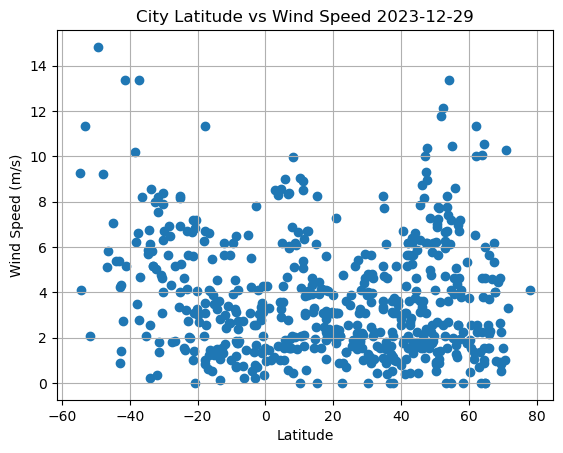

In [58]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
plt.scatter(x_values, y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title(f"City Latitude vs Wind Speed {date_of_analysis}")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

Analysis of Fig4 - Wind Speed vs Latitude: The above scatter plot displayed the relationship 
between Wind Speed vs. Latitude.Today's result shows Wind Speed is up to 15m/s. The wind speed is fairly distributed towards almost all across the cities regardless of latitude locations. 

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [38]:
#def linear_regression (x,y):
    #slope, intercept, rvalue, pvalue, std_err = linregress(x,y) 
    #fit = slope * x + intercept
    #plt.xticks(year, rotation=90)
    #line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    #plt.scatter(x,y)
    #plt.plot(x,fit,"r-")
    #return line_eq

In [59]:
# OPTIONAL: Create a function to create Linear Regression plots
def createLinearRegressionPlot(x_values, y_values, x_label, y_label, hemisphere, line_placement, ylim=None):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    # Get regression values
    regress_values = x_values * slope + intercept
    
    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    fig1, ax1 = plt.subplots(figsize=(10,8))
    plt.scatter(x_values, y_values,alpha = 0.80, edgecolors = "k", linewidths = 1)
    plt.xlabel(x_label,fontsize = 14)
    plt.ylabel(y_label,fontsize = 14)
    if ylim is not None:
        plt.ylim(0, ylim)
    today = date_of_analysis
    plt.title(f"{hemisphere} Hemisphere - {x_label} vs {y_label} {today}",fontsize = 15)
    plt.annotate(line_eq,xy=(10, 50),fontsize=22,xycoords='data',xytext=(0.4, 0.4), textcoords='axes fraction',horizontalalignment='right', verticalalignment='top',color="red")
    plt.annotate(line_eq,xy=(-50, 40),fontsize=22,xycoords='data',xytext=(0.4, 0.3), textcoords='axes fraction',horizontalalignment='right', verticalalignment='top',color="red")
    plt.annotate(line_eq,xy=(10, 25),fontsize=22,xycoords='data',xytext=(0.4, 0.4), textcoords='axes fraction',horizontalalignment='right', verticalalignment='top',color="red")
    # Print r square value
    print(f"The r-squared is: {rvalue**2}")
    correlation = st.pearsonr(x_values,y_values)
    print(f"The correlation between both factors is {round(correlation[0],2)}")
    return plt.plot(x_values,regress_values,"r-")

In [39]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [60]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]


# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Hasaki,35.7333,140.8333,3.22,74,100,1.51,JP,1703876157
2,Cockburn Town,21.4612,-71.1419,26.98,74,75,3.09,TC,1703876158
3,Coahuayana de Hidalgo,18.7000,-103.6583,28.32,50,0,2.38,MX,1703876158
7,Tsimasham,27.0989,89.5360,3.53,83,3,2.56,BT,1703876160
8,Tiksi,71.6872,128.8694,-35.15,99,63,3.29,RU,1703876160


In [61]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,Desaguadero,-16.5656,-69.0417,17.22,41,93,6.62,PE,1703876158
4,Puerto Ayora,-0.7393,-90.3518,29.98,91,53,3.13,EC,1703875896
5,Vila Velha,-20.3297,-40.2925,30.97,78,40,7.20,BR,1703876059
6,Port-aux-Français,-49.3500,70.2167,5.21,74,100,14.83,TF,1703875886
9,Baixa Grande,-11.9597,-40.1681,34.63,25,87,2.99,BR,1703876161


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.7270343333468597
The correlation between both factors is -0.85


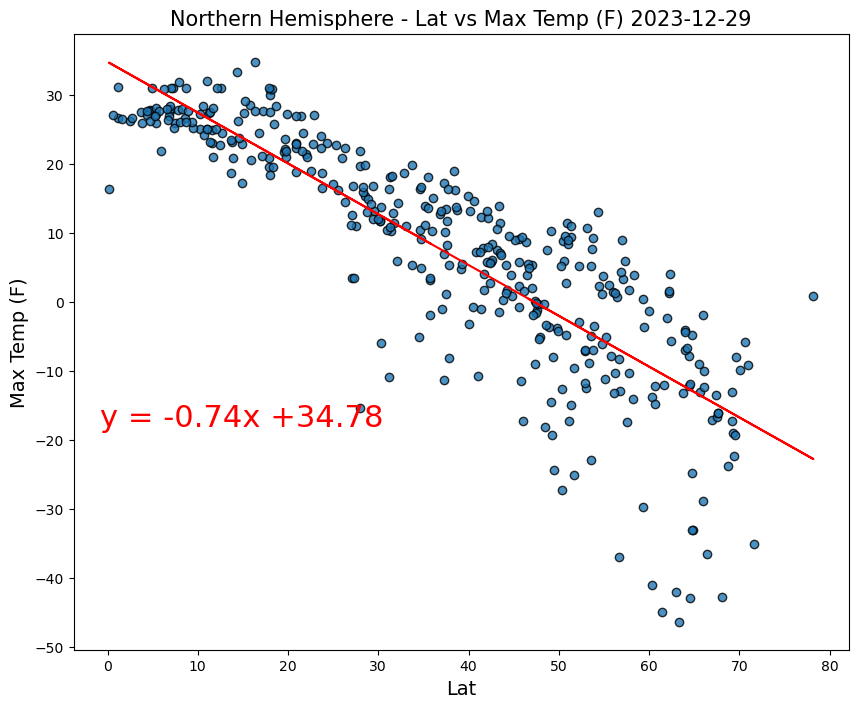

In [62]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
createLinearRegressionPlot(x_values, y_values, "Lat", "Max Temp (F)","Northern",(0, 0))
plt.savefig("./output_data/Northern_Hemisphere_Max_lat_lin.png", bbox_inches="tight")
plt.show()

The above plot is a linear regression model between Maximum tempreture and latitude for Northern Hemisphere cities. The r-squared value shows a strong relationship of Max Tem vs Latitude for Northern hemisphere. These means when we go farther away from the equater(latitude 0) the maximum Temperature (F) will decrease. The corelation factor shows as Max Temperature increases the Latitude goes nearer to the center/Equator. 

The r-squared is: 0.3500860503411135
The correlation between both factors is 0.59


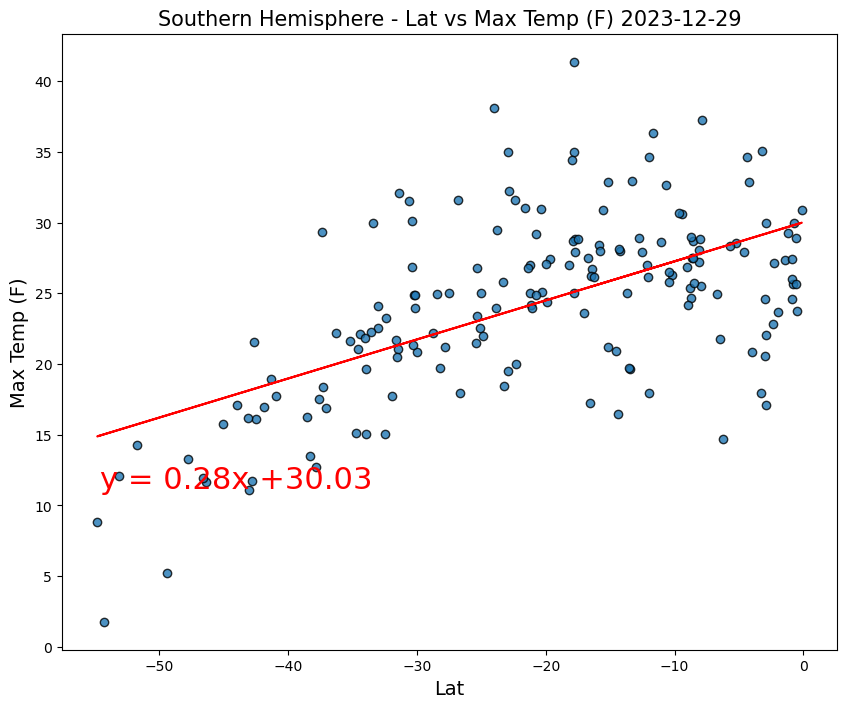

In [63]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
createLinearRegressionPlot(x_values, y_values, "Lat", "Max Temp (F)","Southern",(0, 0))
plt.savefig("./output_data/Southern_Hemisphere_Max_lat_lin.png", bbox_inches="tight")
plt.show()


**Discussion about the linear relationship:** 
The above plot is a linear regression model between Maximum tempreture and latitude for Southern Hemisphere cities. The r-squared value shows a strong relationship of Max Tem vs Latitude for Southern hemisphere. The regression line is the opposite of that of from the Northern Hemisphere. These means when we go farther away from the equater(latitude 0) the maximum Temperature (F) will increase. The correlation factor shows as Max Temperature increases the Latitude goes nearer to the center/Equator. 

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.1661892503437818
The correlation between both factors is 0.41


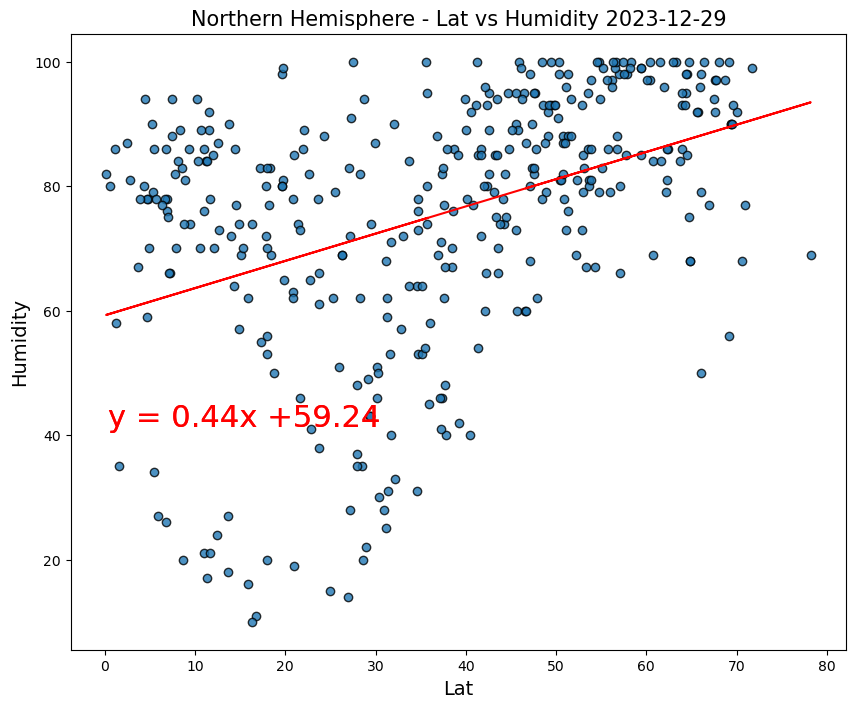

In [65]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
createLinearRegressionPlot(x_values, y_values, "Lat", "Humidity","Northern",(0, 0))
plt.savefig("./output_data/Northern_Hemisphere_Hum_Lat.png", bbox_inches="tight")
plt.show()

The r-squared is: 0.025059840546630744
The correlation between both factors is 0.16


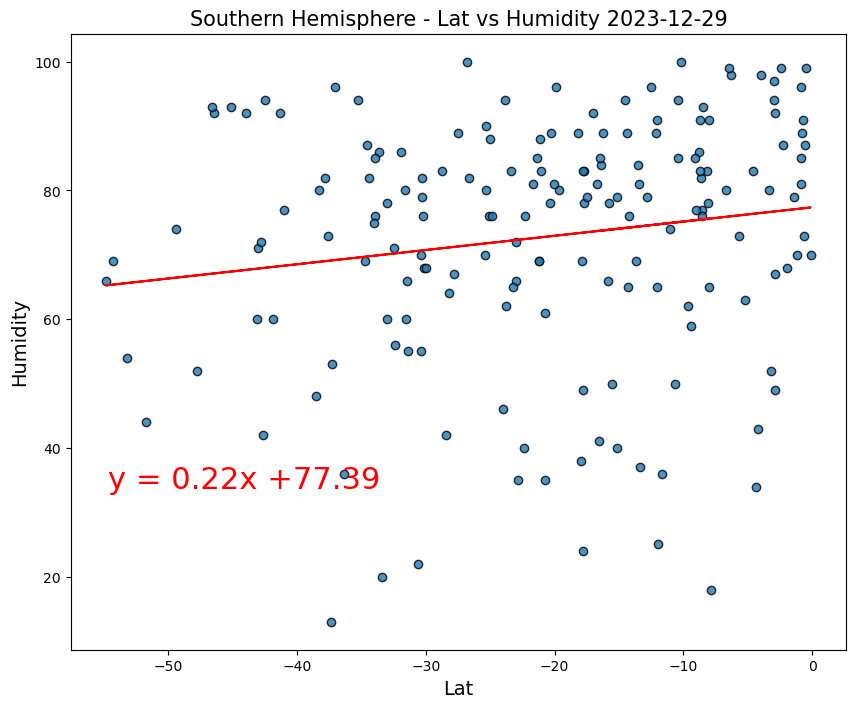

In [66]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
createLinearRegressionPlot(x_values, y_values, "Lat", "Humidity","Southern",(0, 0))
plt.savefig("./output_data/Southern_Hemisphere_Hum_Lat.png", bbox_inches="tight")
plt.show()

**Discussion about the linear relationship:** 
Comparing Linear Regression and Correlation for Northern and Southern Hemisphere, the results are relatively similar. Humidity rises as latitude gets closer to the center/Equator. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.05858428882449097
The correlation between both factors is 0.24


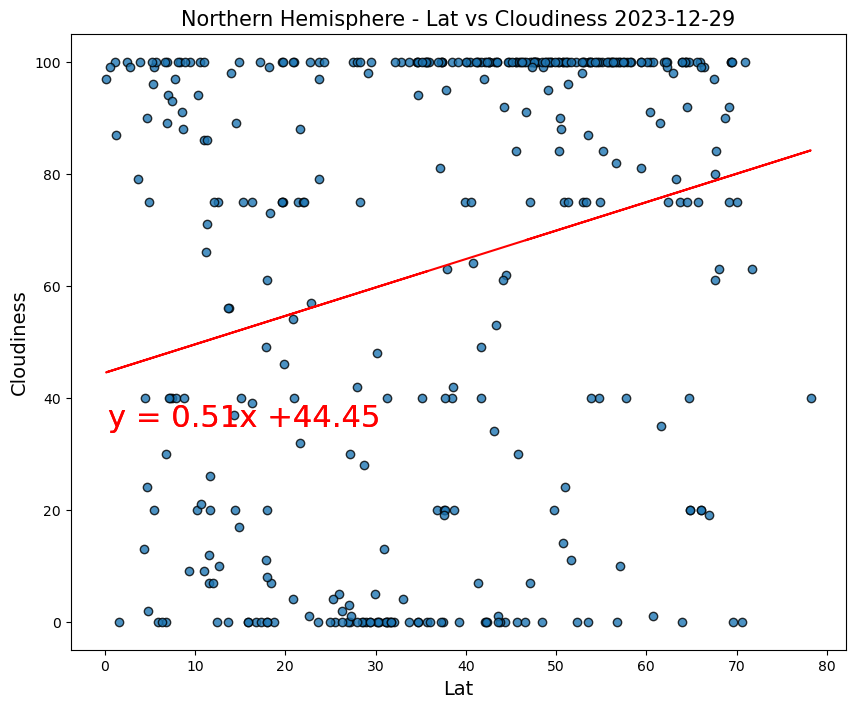

In [67]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
createLinearRegressionPlot(x_values, y_values, "Lat", "Cloudiness","Northern",(0, 0))
plt.savefig("./output_data/Northern_Hemisphere_Cloud_Lat.png", bbox_inches="tight")
plt.show()

The r-squared is: 0.024141663396746834
The correlation between both factors is 0.16


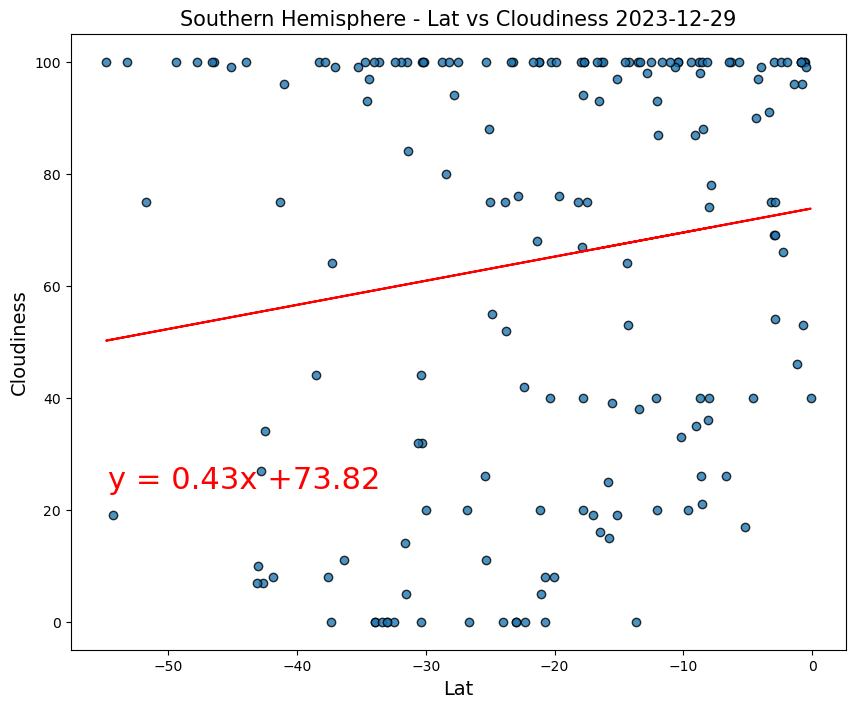

In [68]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
createLinearRegressionPlot(x_values, y_values, "Lat", "Cloudiness","Southern",(0, 0))
plt.savefig("./output_data/Southern_Hemisphere_Cloud_Lat.png", bbox_inches="tight")
plt.show()

**Discussion about the linear relationship:** 
Comparing Linear Regression and Correlation for Northern and Southern Hemisphere, the results are relatively similar. Cloudiness are fairly scatterter as latitude gets closer to the center/Equator.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.001808536320453797
The correlation between both factors is 0.04


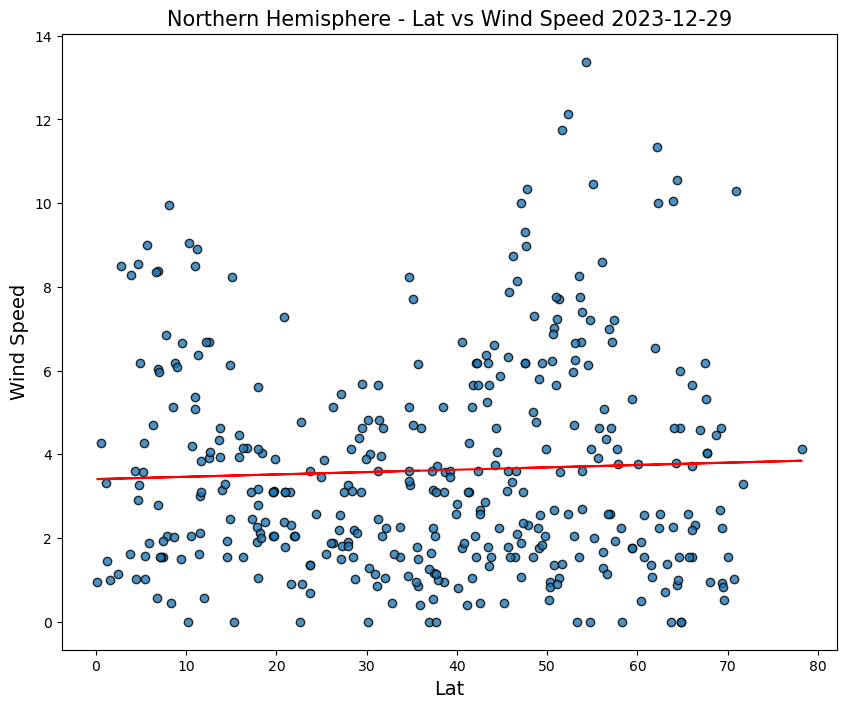

In [69]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
createLinearRegressionPlot(x_values, y_values, "Lat", "Wind Speed","Northern",(0, 0))
plt.savefig("./output_data/Northern_Hemisphere_WS_Lat.png", bbox_inches="tight")
plt.show()

The r-squared is: 0.2248115468001585
The correlation between both factors is -0.47


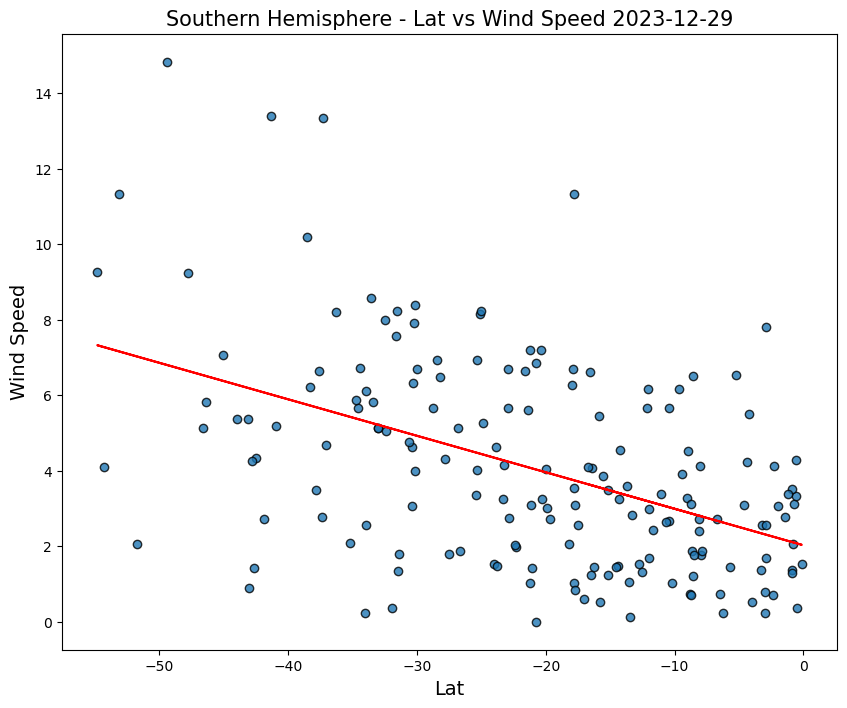

In [70]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
createLinearRegressionPlot(x_values, y_values, "Lat", "Wind Speed","Southern",(0, 0))
plt.savefig("./output_data/Southern_Hemisphere_WS_Lat.png", bbox_inches="tight")
plt.show()

**Discussion about the linear relationship:** 
Comparing Wind Speed vs Latitude's Linear Regression and Correlation for Northern and Southern Hemisphere, the results are relatively the same although at opposite trends. Wind Speed for Northen Hemisphere is on a straight line compared with negative linear relationship while the Southern Hemisphere of downward trend with avery weak linear relationship.